In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import datetime
from sklearn.linear_model import LinearRegression

In [ ]:
baseflow = pd.read_csv('RRCA_baseflow.csv')

In [ ]:
result = []
for date in baseflow['Date']:
        excel_date = int(date)
        py_date = datetime.datetime(1, 1, 1) + datetime.timedelta(excel_date - 2)

        result.append(py_date)

baseflow['formatDate'] = result

display(baseflow)

Evapotranspiration Correlation: r = 0.062247828151394985, p = 7.285232063544412e-15
Precipitation Correlation: r = 0.2700333234609299, p = 1.1917385125264653e-258
Irrigation Pumping Correlation: r = 0.05475677242689354, p = 7.824228676366114e-12


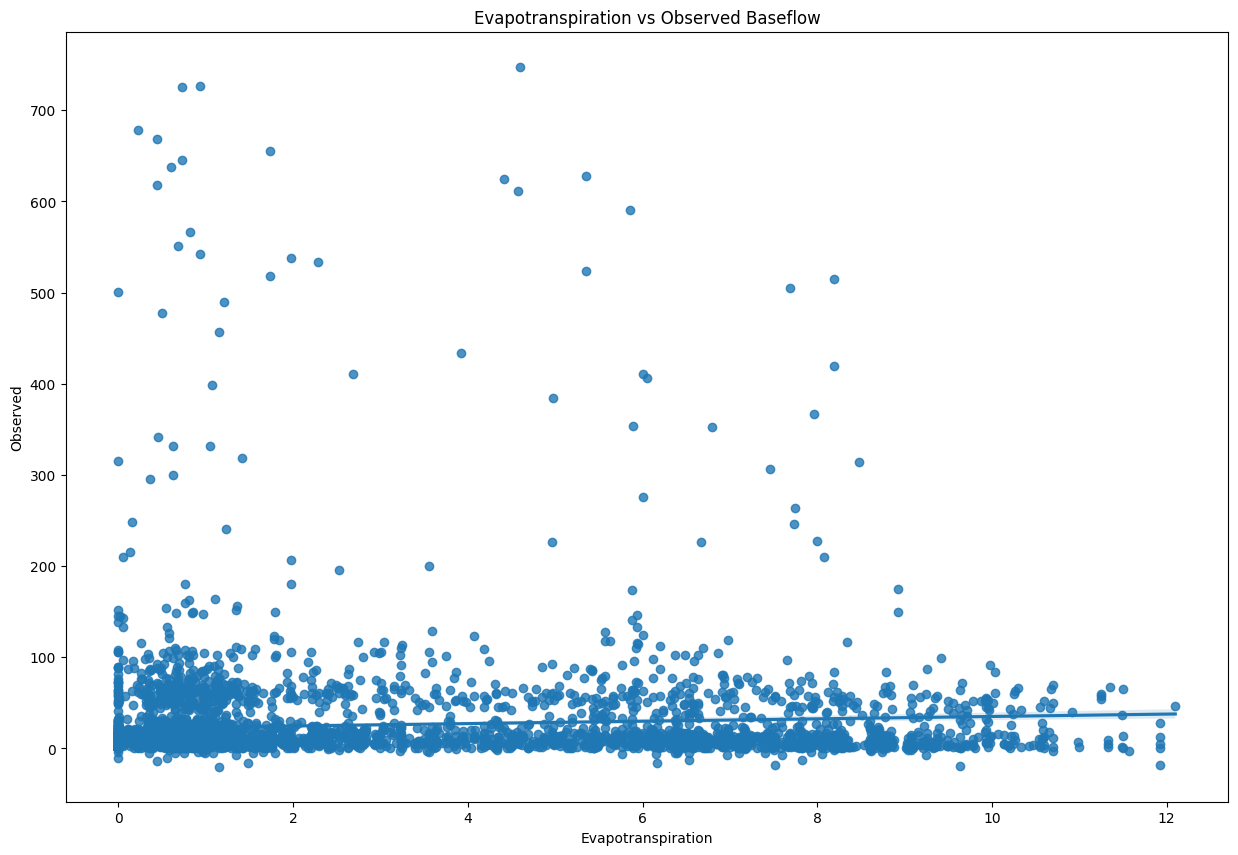

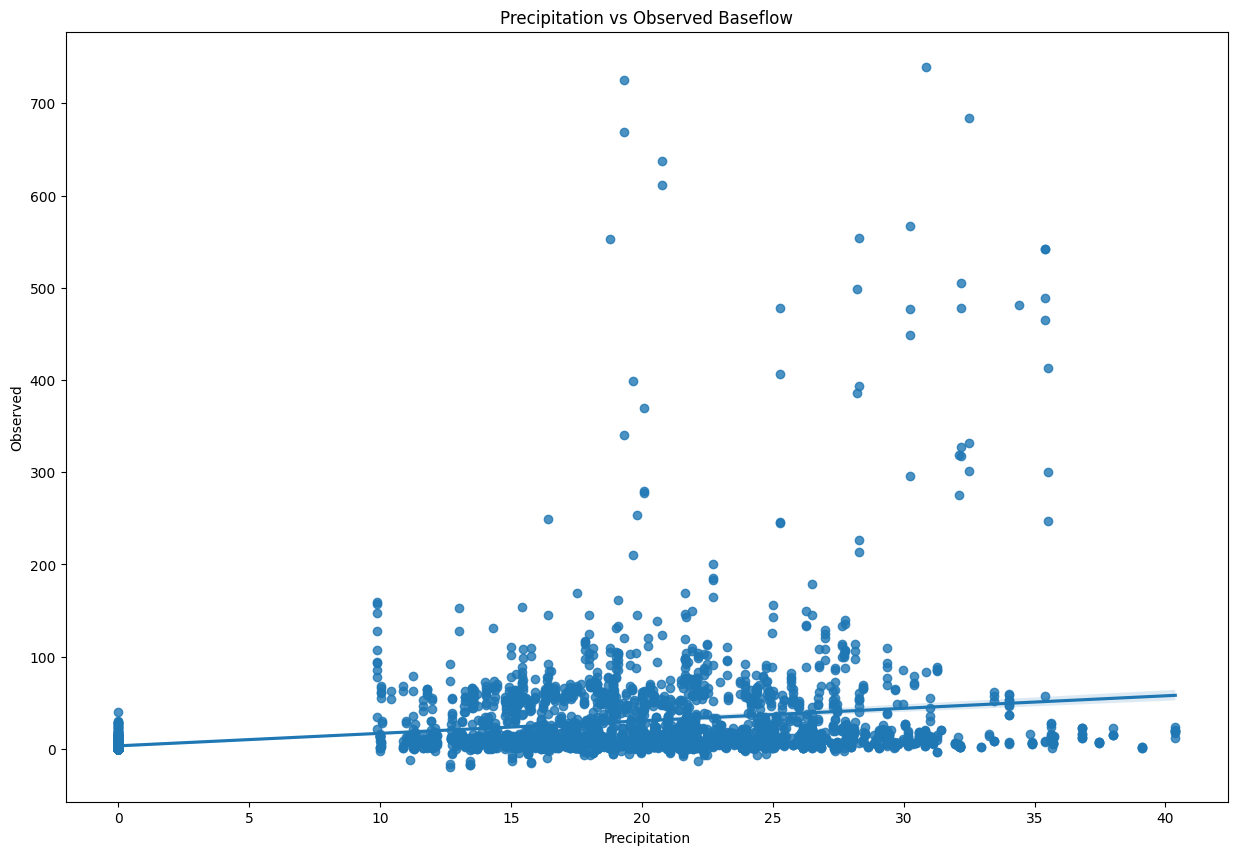

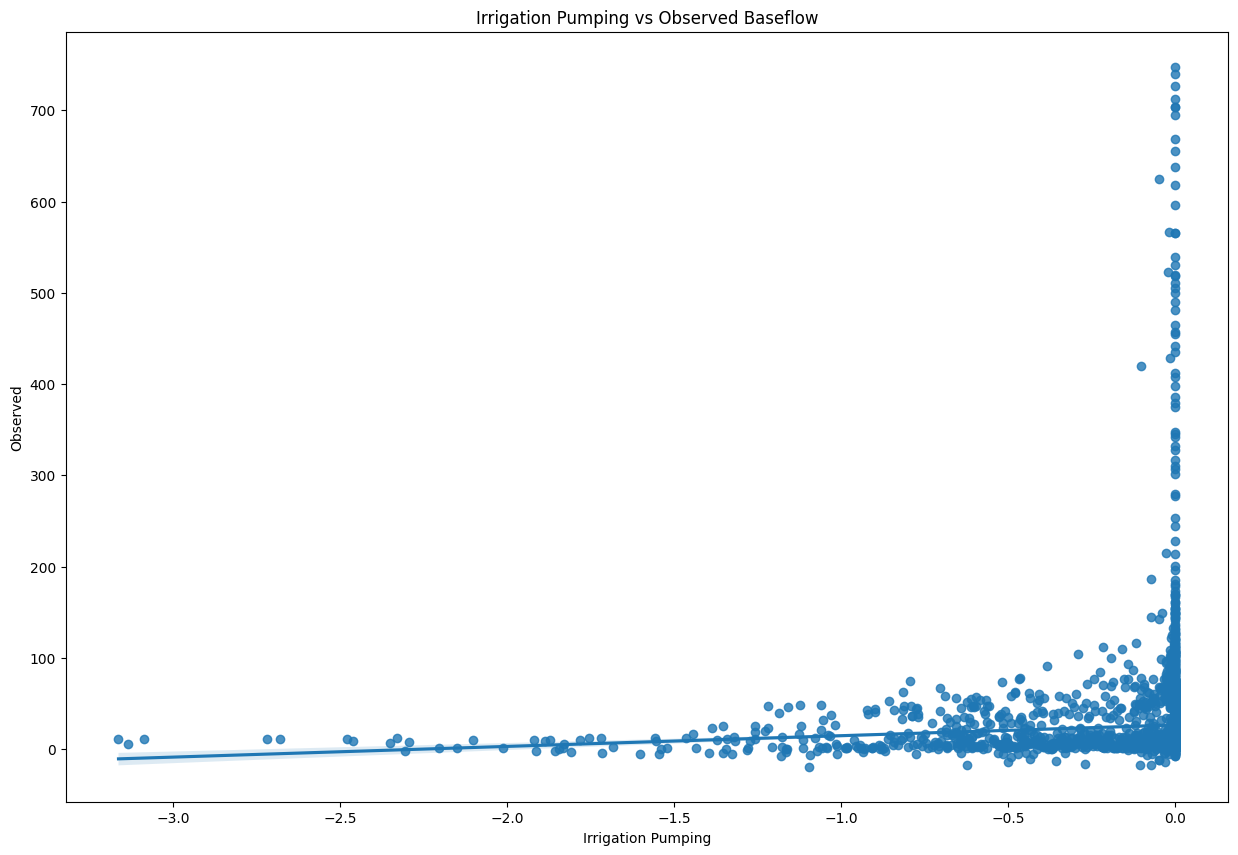

In [67]:
plt.figure(figsize=(15,10))
evapotranspirationGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Evapotranspiration', y='Observed')
evapotranspirationGraph.set(title="Evapotranspiration vs Observed Baseflow")
plt.savefig('./Figs/Evap_vs_ObservedBaseflow.pdf')
(r, p) = stats.pearsonr(baseflow["Evapotranspiration"], baseflow["Observed"]) 
print("Evapotranspiration Correlation: r = " + str(r) + ", p = " + str(p))
plt.figure(figsize=(15,10))
precipitationGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Precipitation', y='Observed')
precipitationGraph.set(title="Precipitation vs Observed Baseflow")
plt.savefig('./Figs/Precip_vs_ObservedBaseflow.pdf')
(r, p) = stats.pearsonr(baseflow["Precipitation"], baseflow["Observed"]) 
print("Precipitation Correlation: r = " + str(r) + ", p = " + str(p))
plt.figure(figsize=(15,10))
irrPumpingGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Irrigation_pumping', y='Observed')
irrPumpingGraph.set(xlabel="Irrigation Pumping", title="Irrigation Pumping vs Observed Baseflow")
plt.savefig('./Figs/IrrPump_vs_ObservedBaseflow.pdf')
(r, p) = stats.pearsonr(baseflow["Irrigation_pumping"], baseflow["Observed"]) 
print("Irrigation Pumping Correlation: r = " + str(r) + ", p = " + str(p))

In [ ]:
plt.figure(figsize=(15, 10))
evapotransipirationTimeGraph = sns.regplot(x='Date', y='Evapotranspiration', data=baseflow.sample(frac=.25))
evapotransipirationTimeGraph.set(title="Evapotranspiration over Time", xlabel="Days since 01-11-1941")
plt.savefig('./Figs/Evap_over_time.pdf')

In [ ]:
plt.figure(figsize=(15, 10))
precipitationTimeGraph = sns.regplot(x='Date', y='Precipitation', data=baseflow.sample(frac=.25))
precipitationTimeGraph.set(title="Precipitation over Time", xlabel="Days since 01-11-1941")
plt.savefig('./Figs/Precip_over_time.pdf')

In [ ]:
plt.figure(figsize=(15, 10))
irrPumpingTimeGraph = sns.regplot(x='Date', y='Irrigation_pumping', data=baseflow.sample(frac=.25))
irrPumpingTimeGraph.set(title="Irrigation Pumping over Time", xlabel="Days since 01-11-1941", ylabel="Irrigation Pumping")
plt.savefig('./Figs/IrrPump_over_time.pdf')

In [ ]:
plt.figure(figsize=(15, 10))
observedTimeGraph = sns.regplot(x='Date', y='Observed', data=baseflow.sample(frac=.05))
observedTimeGraph.set(title="Observed Baseaflow over Time", xlabel="Days since 01-11-1941", ylabel="Observed Baseflow")
plt.savefig('./Figs/Baseflow_over_time.pdf')

In [ ]:
X = baseflow[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']]
y = baseflow.Observed

lm = LinearRegression()
lm.fit(X, y)

display(lm.intercept_)
display(list(zip(['Evapotranspiration', 'Precipitation', 'Irrigation_pumping'], lm.coef_)))

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Observed ~ Evapotranspiration', data=baseflow).fit()
lm.pvalues

In [ ]:
lm = smf.ols(formula='Observed ~ Precipitation', data=baseflow).fit()
lm.pvalues

In [ ]:
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=baseflow).fit()
lm.pvalues

In [ ]:
X = baseflow[['Evapotranspiration', 'Precipitation']]
y = baseflow.Observed

lm = LinearRegression()
lm.fit(X, y)

display(lm.intercept_)
display(list(zip(['Evapotranspiration', 'Precipitation'], lm.coef_)))

In [ ]:
locationAVG = baseflow.groupby(['Segment_id'])[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].mean()
locationMED = baseflow.groupby(['Segment_id'])[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].median()

display(locationAVG)
display(locationMED)

In [ ]:
plt.figure(figsize=(15, 8))
locAVGEvapotranspirationGraph = sns.regplot(x='Evapotranspiration', y='Observed', data=locationAVG)
locAVGEvapotranspirationGraph.set(title="Average Evapotranspiration at Each Site")
plt.savefig('./Figs/Location_AVG_Evap.pdf')
plt.figure(figsize=(15, 8))
locAVGPrecipitationGraph = sns.regplot(x='Precipitation', y='Observed', data=locationAVG)
locAVGPrecipitationGraph.set(title="Average Precipitation at Each Site")
plt.savefig('./Figs/Location_AVG_Precip.pdf')
plt.figure(figsize=(15, 8))
locAVGIrrPumpingGraph = sns.regplot(x='Irrigation_pumping', y='Observed', data=locationAVG)
locAVGIrrPumpingGraph.set(title="Average Irrigation Pumping at Each Site")
plt.savefig('./Figs/Location_AVG_IrrPump.pdf')

In [ ]:
plt.figure(figsize=(15, 8))
locMEDEvapotranspirationGraph = sns.regplot(x='Evapotranspiration', y='Observed', data=locationMED)
locMEDEvapotranspirationGraph.set(title="Median Evapotranspiration at Each Site")
plt.savefig('./Figs/Location_MED_Evap.pdf')
plt.figure(figsize=(15, 8))
locMEDPrecipitationGraph = sns.regplot(x='Precipitation', y='Observed', data=locationMED)
locMEDPrecipitationGraph.set(title="Median Precipitation at Each Site")
plt.savefig('./Figs/Location_MED_Precip.pdf')
plt.figure(figsize=(15, 8))
locMEDIrrPumpingGraph = sns.regplot(x='Irrigation_pumping', y='Observed', data=locationMED)
locMEDIrrPumpingGraph.set(title="Median Irrigation Pumping at Each Site", xlabel="Irrigation Pumping")
plt.savefig('./Figs/Location_MED_IrrPump.pdf')